#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [43]:
## import cv2
## import numpy
## import matplotlib pyplot
## import KMeans cluster from sklearn
## import distance from scipy.spatial
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [45]:
## Reading the image plaksha_Faculty.jpg
picture = cv2.imread("plaksha_Faculty.jpg")
  
## Convert the image to grayscale
greypic = cv2.cvtColor(picture, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(greypic, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face"  ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 2  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(picture, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(picture, text, (x, y-10), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of face detected are {len(faces_rect)}", picture)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\ritus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


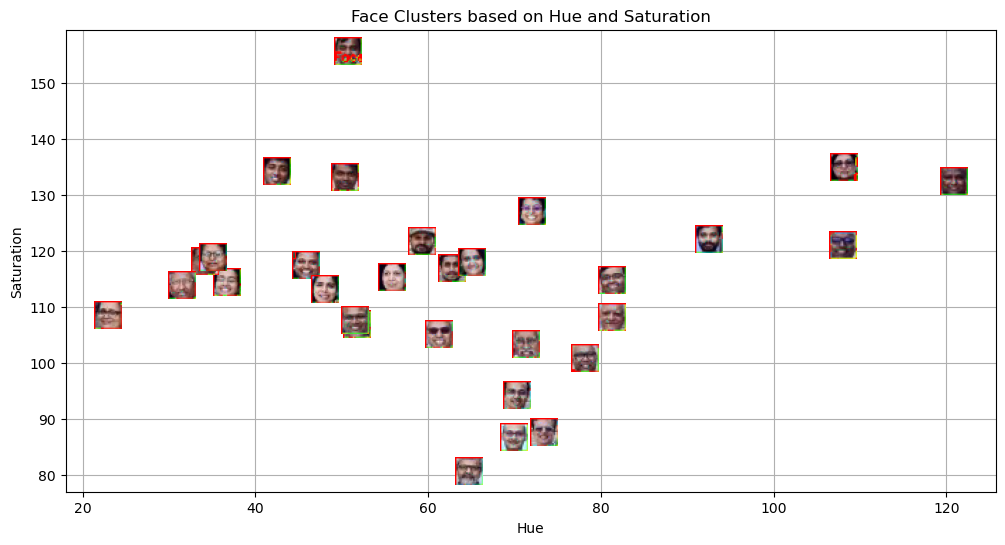

In [47]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
hsv_picture = cv2.cvtColor(picture, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_sat_values = []
face_imgs = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    detected_face = hsv_picture[y:y + h, x:x + w]
    avg_hue = np.mean(detected_face[:, :, 0])
    avg_sat = np.mean(detected_face[:, :, 1])
    hue_sat_values.append((avg_hue, avg_sat))
    face_imgs.append(detected_face)

hue_sat_values = np.array(hue_sat_values)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(hue_sat_values)
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_imgs[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_sat_values[i, 0], hue_sat_values[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_sat_values[i, 0], hue_sat_values[i, 1])
    

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Face Clusters based on Hue and Saturation")
## Put grid
plt.grid(True)
## show the plot
plt.show()


In [55]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_pic = cv2.imread('Dr_Shashi_Tharoor.jpg')
# Detect face  in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(cv2.cvtColor(template_pic, cv2.COLOR_BGR2GRAY), 1.3, 5)
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_pic, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow("Detected Faces", template_pic)
cv2.waitKey(0)
cv2.destroyAllWindows()      

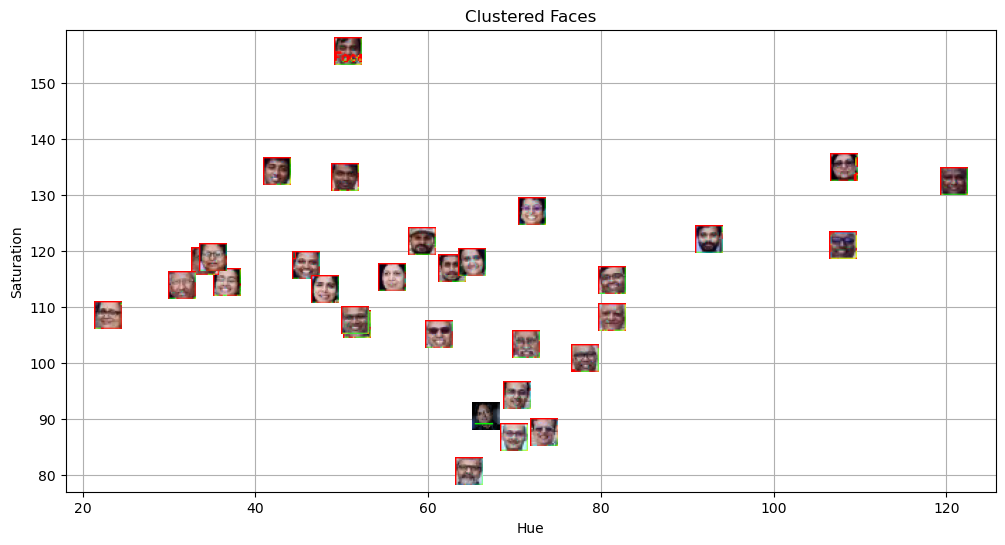

In [57]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv_pic = cv2.cvtColor(template_pic, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue_val = np.mean(template_hsv_pic[:, :, 0])
template_sat_val = np.mean(template_hsv_pic[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_cluster = kmeans.predict([[template_hue_val, template_sat_val]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    face_color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_imgs[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_sat_values[i, 0], hue_sat_values[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_sat_values[i, 0], hue_sat_values[i, 1], 'o', markersize=5, color=face_color)

# Plot the template image in the respective cluster
if template_cluster == 0:
    face_color = 'red'
else:
    face_color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_pic, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue_val, template_sat_val), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Clustered Faces")
## Add grid
plt.grid(True)
## show plot
plt.show()


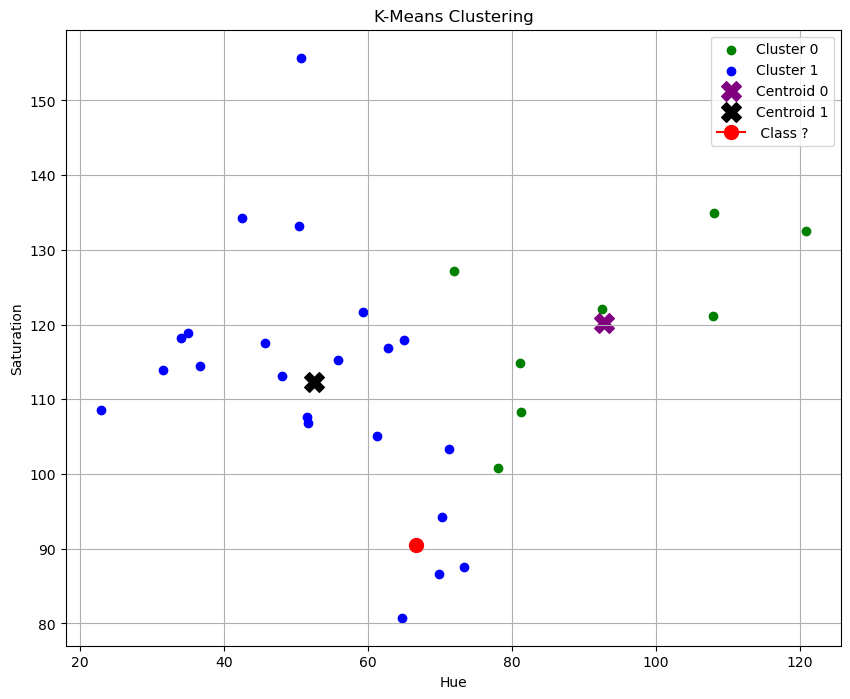

In [59]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(10, 8))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_sat_values[i, 0], hue_sat_values[i, 1]))
    else:
        cluster_1_points.append((hue_sat_values[i, 0], hue_sat_values[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0], centroid_0[1], c='purple', marker='X', s=200, label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c='black', marker='X', s=200, label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue_val, template_sat_val, marker='o', c= 'red',markersize= 10, label=' Class ?' )

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("K-Means Clustering")
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## show the plot
plt.show()
                                            ## End of the lab 5 ##

#### 1. What are the common distance metrics used in distance-based classification algorithms? 

Euclidean Distance - Straight-line distance between two points

Manhattan Distance - Sum of absolute differences along each dimension

Minkowski Distance - Generalization of Euclidean and Manhattan

Mahalanobis Distance - Accounts for variance and correlation in data

Cosine Distance - Measures angle between vectors

Chebyshev Distance - Maximum difference along any single dimension

Hamming Distance - For categorical/binary data, counts differing positions
#### 2. What are some real-world applications of distance-based classification algorithms? 

Image Recognition - Face detection, object classification, handwriting recognition

Medical Diagnosis - Disease classification based on symptoms and test results

Recommendation Systems - Product, movie, or music suggestions

Fraud Detection - Identifying unusual transactions or anomalies

Spam Detection - Email filtering

Customer Segmentation - Grouping customers for targeted marketing

Biometric Authentication - Fingerprint and iris scanning

#### 3. Explain various distance metrics. 
Euclidean Distance - Shortest straight-line distance between two points. Most commonly used.

Manhattan Distance - Sum of absolute differences along each axis. Better for grid-based movements.

Minkowski Distance - Generalized metric that includes both Euclidean and Manhattan as special cases.

Mahalanobis Distance - Measures distance from a point to a distribution. Accounts for correlations and variance in data. Scale-invariant.

Cosine Distance - Measures angle between vectors rather than magnitude. Good for text similarity and high-dimensional data.

Chebyshev Distance - Maximum difference along any single dimension. Used in chess and game theory.

Hamming Distance - Counts positions where two strings or bit sequences differ. Used in error detection and genetics.

#### 4. What is the role of cross validation in model performance? 
Splits dataset into multiple training and validation sets
Model is trained and evaluated on different data subsets repeatedly
Provides more reliable performance estimate than single train-test split
Helps select optimal hyperparameters like K in KNN
Detects overfitting by testing on unseen data
Reduces variance in performance metrics
#### 5. Explain variance and bias in terms of KNN? 
Small K:

Model is very sensitive to individual data points and noise.
Decision boundary is highly irregular and complex and 
Low bias, high variance
Risk of overfitting

Large K:

Decision boundary becomes smooth and simple.
May miss important patterns in data.
High bias, low variance
Risk of underfitting
